In [7]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [8]:
import numpy as np
import pandas as pd

In [9]:
import datetime as dt

In [10]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [11]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [12]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [13]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [14]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [15]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
last_12_months_precipitation = session.query(Measurement.date, Measurement.prcp).\
        filter(Measurement.date >= '2016-08-24').filter(Measurement.date <= '2017-08-23').order_by(Measurement.date).all()

df_last12months_precipitation = pd.DataFrame(data=last_12_months_precipitation)
df_last12months_precipitation.head(40)

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
5,2016-08-24,2.15
6,2016-08-24,1.45
7,2016-08-25,0.08
8,2016-08-25,0.08
9,2016-08-25,0.00


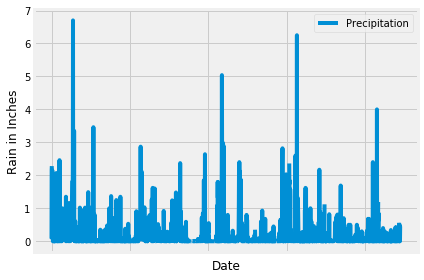

In [17]:
# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame and set the index to the date column
df_last12months_precipitation.set_index('date').head()

# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data
df_last12months_precipitation.plot('date', 'prcp')
plt.xlabel("Date")
plt.ylabel("Rain in Inches")
plt.legend(["Precipitation"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_last12months_precipitation.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [19]:
# Design a query to show how many stations are available in this dataset?
locations = session.query(Base.classes.station).count()
print("There are {} stations.".format(locations))

There are 9 stations.


In [31]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

station_activity = session.query(Measurement.station,
                  func.count(Measurement.station))\
.group_by(Measurement.station)\
.order_by(func.count(Measurement.station).desc())
for row in station_activity:
    print(row)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [32]:
highest_station_activity = session.query(Measurement.station,
                  func.count(Measurement.station))\
.group_by(Measurement.station)\
.order_by(func.count(Measurement.station).desc()).limit(1).scalar()
print(f"The station with the hightest number of observations is {highest_station_activity}. ")

The station with the hightest number of observations is USC00519281. 


In [33]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

q = session.query(Station.id,
                  Station.name,
                  func.min(Measurement.tobs),
                  func.max(Measurement.tobs),
                  func.avg(Measurement.tobs))\
.filter(Measurement.station == Station.station)\
.filter(Measurement.station == "USC00519281")
avg_tmp_rec = "{0:.1f}".format(q[0][4])
print(f"Most Active Station ID: {q[0][0]}, \
    Name: {highest_station_activity},\
    Location: {q[0][1]} \nResults: \n    Minimum temperature recorded:  {q[0][2]}\n\
    Maximum temperture recorded :  {q[0][3]}\n    Average temperature recorded:  {avg_tmp_rec}")

Most Active Station ID: 7,     Name: USC00519281,    Location: WAIHEE 837.5, HI US 
Results: 
    Minimum temperature recorded:  54.0
    Maximum temperture recorded :  85.0
    Average temperature recorded:  71.7


In [38]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temperature_twelve = session.query(Measurement.tobs)\
    .filter(Measurement.date > '2016-08-24')\
    .filter(Measurement.station == highest_station_activity)\
    .order_by(Measurement.tobs).all()
    
for row in temperature_twelve:
    print(row)

(59.0,)
(59.0,)
(59.0,)
(60.0,)
(60.0,)
(61.0,)
(62.0,)
(62.0,)
(62.0,)
(62.0,)
(62.0,)
(62.0,)
(63.0,)
(63.0,)
(63.0,)
(63.0,)
(64.0,)
(64.0,)
(64.0,)
(65.0,)
(65.0,)
(65.0,)
(65.0,)
(65.0,)
(65.0,)
(65.0,)
(66.0,)
(66.0,)
(66.0,)
(66.0,)
(66.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(68.0,)
(68.0,)
(68.0,)
(68.0,)
(68.0,)
(68.0,)
(68.0,)
(68.0,)
(68.0,)
(68.0,)
(68.0,)
(68.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(72.0,)
(72.0,)
(72.0,)
(72.0,)
(72.0,)
(72.0,)
(72.0,)
(72.0,)


In [39]:
temperature_df = pd.DataFrame(temperature_twelve, columns=['temp'])
temperature_df.head()

,temp
0,59.0
1,59.0
2,59.0
3,60.0
4,60.0


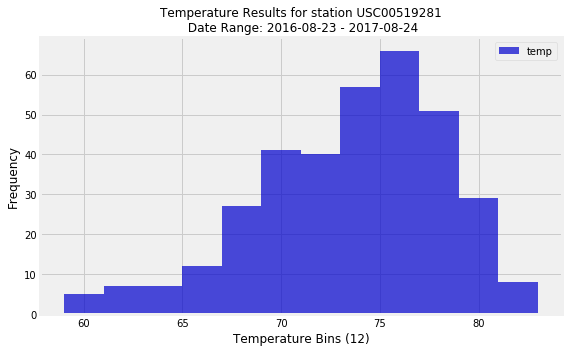

In [44]:
# Plot Temperature Results for Most Active Station
plt.subplots(figsize=(8,5))

plt.hist(temperature_df['temp'], bins=12, color="mediumblue", alpha=.7)
plt.title(f"Temperature Results for station {highest_station_activity}\n Date Range: \
{'2016-08-23'} - {'2017-08-24'}",fontsize=12)
plt.xlabel('Temperature Bins (12)', fontsize=12)
plt.ylabel("Frequency", fontsize=12)
labels = ['temp']
plt.legend(labels)
plt.gcf().subplots_adjust(bottom=0.15)
plt.tight_layout()
plt.savefig('temperature_results_hist.png')
plt.show()

In [63]:
from flask import Flask, json, jsonify
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect

engine = create_engine("sqlite:///Resources/hawaii.sqlite")
#engine = create_engine("sqlite:///../Resources/hawaii.sqlite")


# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station
session = Session(engine)
app = Flask(__name__)

# CLASSES
# measurement :  id ,  INTEGER
# measurement :  station ,  TEXT
# measurement :  date ,  TEXT
# measurement :  prcp ,  FLOAT
# measurement :  tobs ,  FLOAT
# station :  id ,  INTEGER
# station :  station ,  TEXT
# station :  name ,  TEXT
# station :  latitude ,  FLOAT
# station :  longitude ,  FLOAT
# station :  elevation ,  FLOATport Flask, json, jsonify


In [64]:
@app.route('/')
def home_route():
    """ Available API Route Endpoints"""
    return (f"Enter Available Route Endpoints.  Where dates are required, modify date selection as desired: <br><br/>"
        f"1.   2017 dates & temps dictionary:   <br/>"
        f"   /api/v1.0/precipitation/ <br><br/>" 
        f"2.   JSON list of stations:    <br/>"
        f" /api/v1.0/stations/ <br><br/>" 
        f"3.    2017 JSON list of Temp Observations:  <br/>"
        f" /api/v1.0/tobs/ <br><br/>"
        f"For the following, enter date as form 'yyyy' or 'yyyy-mm' or 'yyyy-mm-dd' for BEST RESULTS! <br><br/>"
        f"4.    Stats Combined Stations. Enter Start date:  <br/>"
        f" /api/v1.0/2016-01-01/ <br><br/>" 
        f"5.    Stats Combined Stations. Enter Start & End Date:  <br/>"
        f" /api/v1.0/2016-01-01/2016-12-31/ <br><br/>"
        f"BONUS Options for the interested! <br><br/>"
        f"6.    Stats by Station,  Enter Start date:    <br/>"
        f"  /api/v1.0/station/2017-01-01/ <br><br/>" 
        f"7.    Stats by Station,  Enter Start & End date:   <br/>"
        f"   /api/v1.0/station/2016-01-01/2016-12-31/ <end>")

In [65]:
#    Query Measurements for... All Stations
#    Dates and temperature observations from the last year.
#    Convert the query results to a Dictionary using 'date' as the key and 'tobs' as the value.
#    Return the JSON representation of your dictionary
@app.route('/api/v1.0/precipitation/')
def precipitation():
    prcp_results = session.query(Measurement.date, Measurement.tobs)\
    .filter(Measurement.date >= '2017-01-01').all()
    p_dict = dict(prcp_results)
    print()
    print("Results for Precipitation")
    return jsonify(p_dict) 

In [66]:
#    Query Stations for.... Stations
#    Return a JSON-list of stations from the dataset.
@app.route('/api/v1.0/stations/')
def stations():
    station_list = session.query(Station.station)\
    .order_by(Station.station).all() 
    print()
    print("Station List:")   
    for row in station_list:
        print (row[0])
    return jsonify(station_list)

In [67]:
@app.route('/api/v1.0/tobs/')
def tobs():
    temp_obs = session.query(Measurement.tobs)\
    .order_by(Measurement.date).all()
    print()
    print("Temperature Results for All Stations")
    return jsonify(temp_obs)

In [68]:
@app.route('/api/v1.0/<start>/')
def combined_start_stats(start):
    q = session.query(Station.id,
                  Station.station,
                  func.min(Measurement.tobs),
                  func.max(Measurement.tobs),
                  func.avg(Measurement.tobs))\
                  .filter(Measurement.station == Station.station)\
                  .filter(Measurement.date >= start).all()                  
    print()
    print("Query Temps Combinded Stations with Start ({start}) Date")
    for row in q:
        print()
        print(row)
    return jsonify(q)

In [69]:
@app.route('/api/v1.0/<start>/<end>/')
def combined_start_end_stats(start,end):
    q = session.query(Station.id,
                  Station.station,
                  func.min(Measurement.tobs),
                  func.max(Measurement.tobs),
                  func.avg(Measurement.tobs))\
                  .filter(Measurement.station == Station.station)\
                  .filter(Measurement.date <= end)\
                  .filter(Measurement.date >= start).all()
    print()
    print(f"Query Temps Combined Stations with Start ({start}) and End ({end}) Date")
    for row in q:
        print()
        print(row)
    return jsonify(q)

In [70]:
@app.route('/api/v1.0/station/<start>/')
def station_start_stats(start):
    q = session.query(Station.id,
                  Station.station,
                  func.min(Measurement.tobs),
                  func.max(Measurement.tobs),
                  func.avg(Measurement.tobs))\
                  .filter(Measurement.station == Station.station)\
                  .filter(Measurement.date >= start)\
                  .group_by(Station.station)\
                  .order_by(Station.id).all()
    print()
    print("Query Temps for Stations with Start ({start}) Date")
    for row in q:
        print()
        print(row)
    return jsonify(q)

In [71]:
# Query Measurements for.... by Station
# Repeat of above stat request, but with end date added to decorator
@app.route('/api/v1.0/station/<start>/<end>/')
def station_start_end_stats(start,end):
    q = session.query(Station.id,
                  Station.station,
                  func.min(Measurement.tobs),
                  func.max(Measurement.tobs),
                  func.avg(Measurement.tobs))\
                  .filter(Measurement.station == Station.station)\
                  .filter(Measurement.date <= end)\
                  .filter(Measurement.date >= start)\
                  .group_by(Station.station)\
                  .order_by(Station.id).all()
    print()
    print(f"Query Temps for Stations with Start ({start}) and End ({end}) Date")
    for row in q:
        print()
        print(row)
    return jsonify(q)